In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rc('font', family='GULIM')

In [98]:
pred1=pd.read_csv('Files/BiLSTM/additionalX_BZ.csv', index_col=0)
pred2=pd.read_csv('Files/Backbone_BiLSTM_SP.csv', index_col=0)

In [99]:
def calculate_mae(gt, output):
    mae = mean_absolute_error(gt, output)
    return mae


def calculate_rmse(gt, output):
    rmse = np.sqrt(mean_squared_error(gt, output))
    return rmse

In [100]:
gt=pred1.loc['2008-09-01':'2009-06-01', 'Ground Truths']
out=pred1.loc['2008-09-01':'2009-06-01', 'Predictions']

gt2=pred1.loc[:'2008-09-01', 'Ground Truths']
out2=pred1.loc[:'2008-09-01', 'Predictions']

In [101]:
print('뒤')
print(calculate_mae(gt.values, out.values))
print(calculate_rmse(gt.values, out.values))

뒤
0.008518175507879316
0.011160519210982787


In [102]:
print('앞')
print(calculate_mae(gt2.values, out2.values))
print(calculate_rmse(gt2.values, out2.values))

앞
0.0028361555120887637
0.0038796657179442865


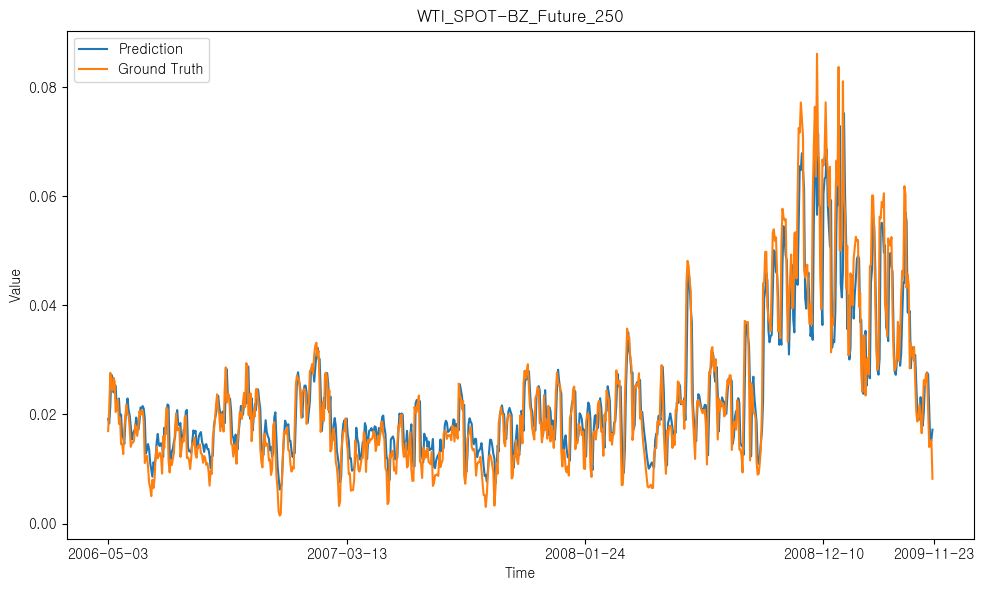

In [67]:
plt.figure(figsize=(10,6))
plt.plot( pred1['Predictions'].loc[:'2009-06-01'], label='Prediction')
plt.plot( pred1['Ground Truths'].loc[:'2009-06-01'],label='Ground Truth')
plt.title('WTI_SPOT-BZ_Future_250')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.xticks(pred1.index[0:-2:221])
plt.tight_layout()
plt.show()

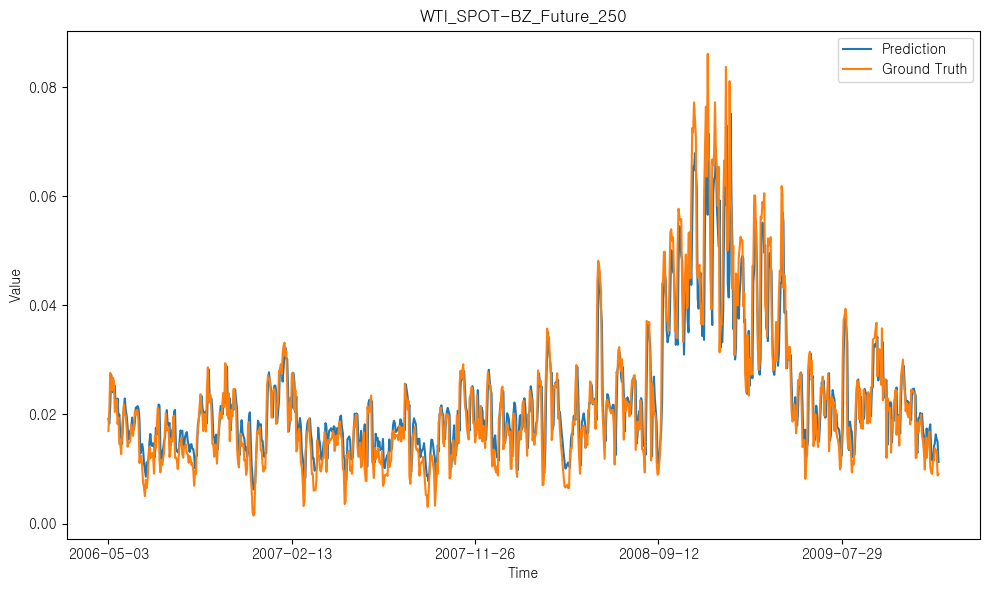

In [66]:
plt.figure(figsize=(10,6))
plt.plot( pred1['Predictions'].iloc[0:-2], label='Prediction')
plt.plot( pred1['Ground Truths'].iloc[0:-2],label='Ground Truth')
plt.title('WTI_SPOT-BZ_Future_250')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.xticks(pred1.index[0:-2:201])
plt.tight_layout()
plt.show()

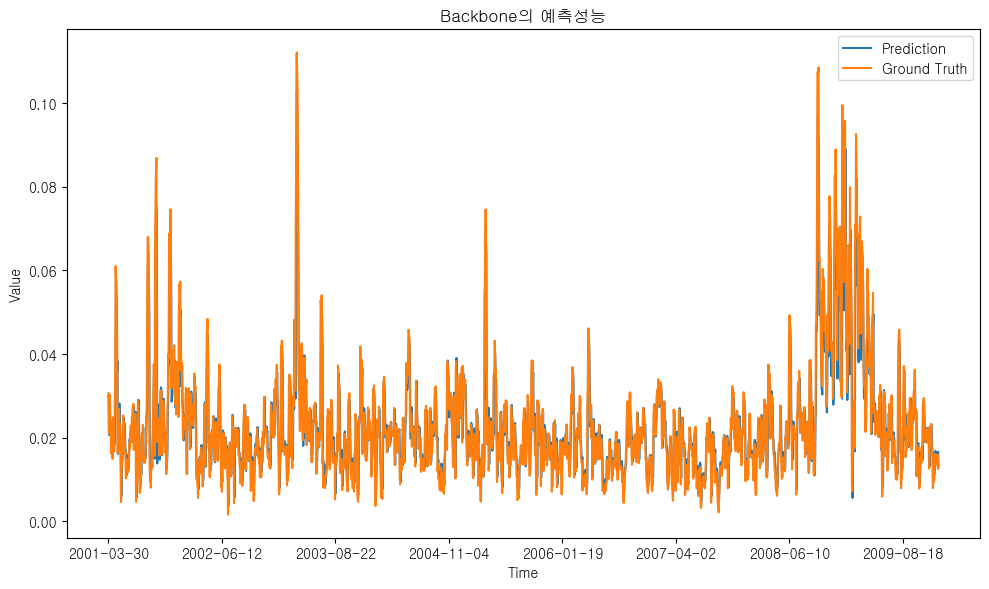

In [21]:
plt.figure(figsize=(10,6))
plt.plot( pred2['Predictions'].iloc[:-2], label='Prediction')
plt.plot( pred2['Ground Truths'].iloc[:-2],label='Ground Truth')
plt.title('Backbone의 예측성능')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.xticks(pred2.index[0:-1:300])
plt.tight_layout()
plt.show()